#**This notebook is mean for visualizations only**

In [1]:
%matplotlib inline


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
!pip install umap-learn


     |████████████████████████████████| 81kB 5.7MB/s 
     |████████████████████████████████| 1.2MB 16.2MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=b79f1fc9a1426bed0eb8651a4854402e7450f7d9bd2302816494332ce45d0400
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51351 sha256=a807f83d58ff1990ce689b76289730d2e92dd9c610ecafe0229dc93d88470f9f
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent


In [4]:
!pip install umap-learn[plot]

     |████████████████████████████████| 15.8MB 360kB/s 
     |████████████████████████████████| 81kB 8.6MB/s 
     |████████████████████████████████| 112kB 32.9MB/s 
     |████████████████████████████████| 706kB 49.0MB/s 
  Created wheel for datashape: filename=datashape-0.5.2-cp37-none-any.whl size=59430 sha256=0c226cd470d64f00e54f661ea8ff32f27f0f129df9bba4d67265d471696ccb77
  Stored in directory: /root/.cache/pip/wheels/8d/06/05/c1cba3d57bdcfd3960e3f60a9fdc97e4baef2ef09af0ad1ef8
Successfully built datashape
ERROR: distributed 2021.4.1 has requirement cloudpickle>=1.5.0, but you'll have cloudpickle 1.3.0 which is incompatible.
ERROR: distributed 2021.4.1 has requirement dask>=2021.03.0, but you'll have dask 2.12.0 which is incompatible.
  Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-1.25.3


In [5]:
import pandas as pd
import numpy as np
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from nltk.corpus import stopwords
from nltk.util import ngrams

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix

from collections import defaultdict
from collections import Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))

import re
from nltk.tokenize import word_tokenize
import gensim
import string

from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam

###Import data

In [6]:
df = pd.read_csv('/content/drive/MyDrive/WSU/Winter_2021/CSC 7810/Final Project/df_main_res.csv')
df['target'] = df['target'].astype(str)
df['review'] = df['review'].values.astype('U')
train_df, test_df = train_test_split(df, test_size=0.1)

x_train = train_df['review'].values
y_train = train_df['target'].values
x_test = test_df['review'].values
y_test = test_df['target'].values

###Using BoW CV

In [7]:
def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = df["review"].tolist()
list_labels = df["target"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=10)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

###Create SVD matrix

In [8]:
def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(color_mapper))
            orange_patch = mpatches.Patch( label='Negative')
            blue_patch = mpatches.Patch( label='Positive')
            plt.legend()


###Plot

In [9]:
fig = plt.figure(figsize=(12, 12))          
#plot_LSA(X_train_counts, y_train)
plt.show()

<Figure size 864x864 with 0 Axes>

###Create TF-IDF BoW

In [10]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
fig = plt.figure(figsize=(16, 16))          
#plot_LSA(X_train_tfidf, y_train)
plt.show()

<Figure size 1152x1152 with 0 Axes>

In [11]:
import pandas as pd
import umap
import umap.plot

# Used to get the data
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Some plotting libraries
import matplotlib.pyplot as plt
from bokeh.plotting import show, save, output_notebook, output_file
from bokeh.resources import INLINE
output_notebook(resources=INLINE)

In [12]:
def umss(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = umap.UMAP(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(color_mapper))
            orange_patch = mpatches.Patch( label='Negative')
            blue_patch = mpatches.Patch( label='Positive')
            plt.legend()

In [13]:
#fig = plt.figure(figsize=(16, 16))          
#umss(X_train_tfidf, y_train)
#plt.show()

In [14]:
lsa = umap.UMAP(n_components=2)
lsa.fit(X_train_tfidf)
lsa_scores = lsa.transform(X_train_tfidf)
color_mapper = {label:idx for idx,label in enumerate(set(y_train))}
color_column = [color_mapper[label] for label in y_train]
colors = ['orange','blue']

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [15]:
color_mapper

{'0': 0, '1': 1}

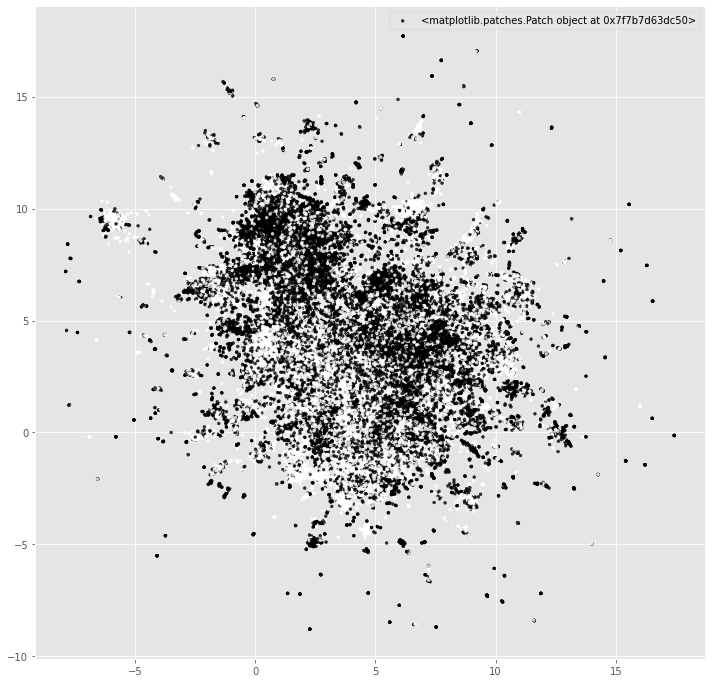

In [16]:
fig = plt.figure(figsize=(12, 12)) 
plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=y_train, cmap=matplotlib.colors.ListedColormap(color_mapper))
orange_patch = mpatches.Patch( label='0')
blue_patch = mpatches.Patch( label='1')
plt.legend([orange_patch, blue_patch])
